# A Large Scale Fish Dataset
- A Large-Scale Dataset for Fish Segmentation and Classification<br>
https://www.kaggle.com/crowww/a-large-scale-fish-dataset

## 1. Data Analysis <br>
- 아래와 같이 9 종류의 물고기 데이터가 존재한다. <br>
- 이미지는 RGB scale이고, 590 * 445 로 resize 되었다. <br> 
- Prepare Dataset.ipynb를 통해 실제 물고기의 영역만 보이도록 하였다. <br>

In [1]:
ls datasets/Fish_Dataset/Fish_Dataset

In [2]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np

# 경고 메시지 무시하기
import warnings
warnings.filterwarnings("ignore")

(445, 590, 3)


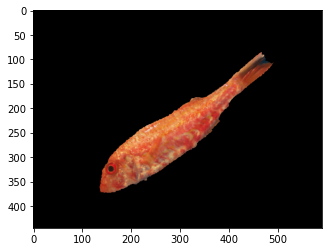

In [3]:
# Show Sample Image
path = './datasets/Fish_Dataset/Fish_Dataset/Red Mullet/Red Mullet/00025.png'
sample = img.imread(path)

plt.figure()
plt.imshow(sample)

print(sample.shape)

## 2. Data Preparation
정해진 비율에 따라 dataset을 trainset, valset, testset으로 나눈다.<br>
이 노트북에선 (trainset + valset) : testset = 8 : 2, trainset : valset = 8 : 2이다.

In [4]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split

import torchvision
from torchvision import transforms, utils

In [5]:
trans = transforms.Compose([transforms.ToTensor(),
                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = torchvision.datasets.ImageFolder(root='./datasets/Fish_Dataset/Fish_Dataset',
                                          transform=trans)

# devide dataset in trainset & testset
train_size = int(0.8 * len(dataset))
test_size = int(len(dataset) - train_size)
trainset, testset = torch.utils.data.random_split(dataset, [train_size, test_size])

# devide trainset in trainset & valset
train_size = int(0.8 * len(trainset))
val_size = int(len(trainset) - train_size)
trainset, valset = torch.utils.data.random_split(trainset, [train_size, val_size])

# Dataset
partition = {'train': trainset, 'val': valset, 'test': testset}
# Label
classes = dataset.classes